# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [3]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [4]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [1]:
import pandas as pd
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [6]:
df

,First Name,Last Name
0,Panos,Ipeirotis
1,John,Doe
2,NaN,Trump


## Analyzing Data in Files

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.

If you do not have it, then uncomment below the lines that start with ! and execute the following:

In [7]:
# Creates a folder "data" under the current folder
!mkdir -p data
# Removes any prior file if it exists
!rm -f data/restaurant.csv*
# Fetches the most recent dataset and stores it under the folder data
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
# Compresses the text file, both for saving space and for loading faster
!gzip data/restaurant.csv
# Take a look at the first 3 lines of the file, to ensure that everything worked fine
# !gzip -cd data/restaurant.csv.gz | head -3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  134M    0  134M    0     0  4729k      0 --:--:--  0:00:29 --:--:-- 4624k 0 84.6M    0     0  4770k      0 --:--:--  0:00:18 --:--:-- 4826k


### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [1]:
import pandas as pd
restaurants = pd.read_csv("C:/Users/Digital Nest/Downloads/restaurant.csv")

C:\Users\Digital Nest\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [9]:
list(restaurants)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE']

In [2]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaN,05/22/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,18.0,NaN,NaN,05/22/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,18.0,NaN,NaN,05/22/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,18.0,NaN,NaN,05/22/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,18.0,NaN,NaN,05/22/2019,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [10]:
restaurants["SCORE"].describe()

count    364865.000000
mean         19.822841
std          14.232408
min          -1.000000
25%          11.000000
50%          15.000000
75%          25.000000
max         166.000000
Name: SCORE, dtype: float64

In [13]:
restaurants["SCORE"]

0         18.0
1         18.0
2         18.0
3         18.0
4         18.0
5          5.0
6          5.0
7          7.0
8          7.0
9         13.0
10        13.0
11        13.0
12        12.0
13        12.0
14        12.0
15        10.0
16        10.0
17         7.0
18        11.0
19        11.0
20        48.0
21        48.0
22        48.0
23        48.0
24        48.0
25        13.0
26        13.0
27        13.0
28        13.0
29         NaN
          ... 
382791     NaN
382792     NaN
382793     NaN
382794     NaN
382795     NaN
382796     NaN
382797     NaN
382798     NaN
382799     NaN
382800     NaN
382801     NaN
382802     NaN
382803     NaN
382804     NaN
382805     NaN
382806     NaN
382807     NaN
382808     NaN
382809     NaN
382810     NaN
382811     NaN
382812     NaN
382813     NaN
382814     NaN
382815     NaN
382816     NaN
382817     NaN
382818     NaN
382819     NaN
382820     NaN
Name: SCORE, Length: 382821, dtype: float64

We can also check the data types for each column

In [ ]:
restaurants.dtypes

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [14]:
restaurants.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [15]:
restaurants["SCORE1"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
SCORE1                   float64
dtype: object

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [16]:
restaurants.SCORE.describe()

count    364865.000000
mean         19.822841
std          14.232408
min          -1.000000
25%          11.000000
50%          15.000000
75%          25.000000
max         166.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

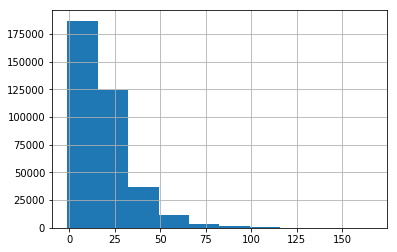

In [18]:
import matplotlib
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

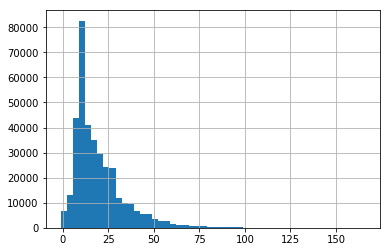

In [19]:
import matplotlib
restaurants["SCORE"].hist(bins=50)

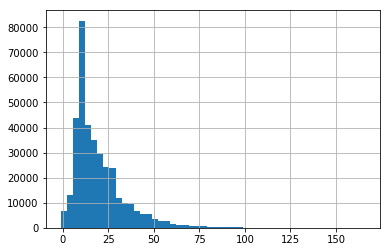

In [20]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

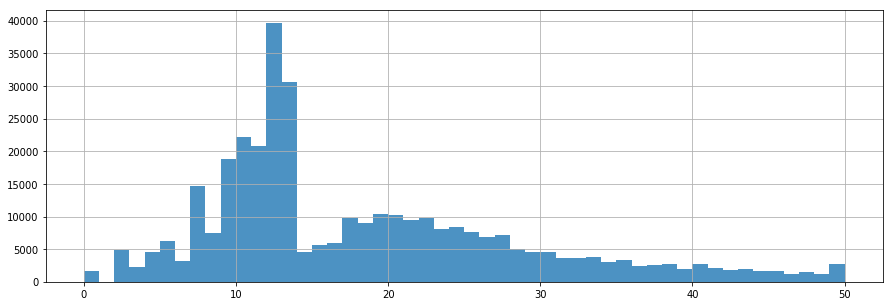

In [21]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

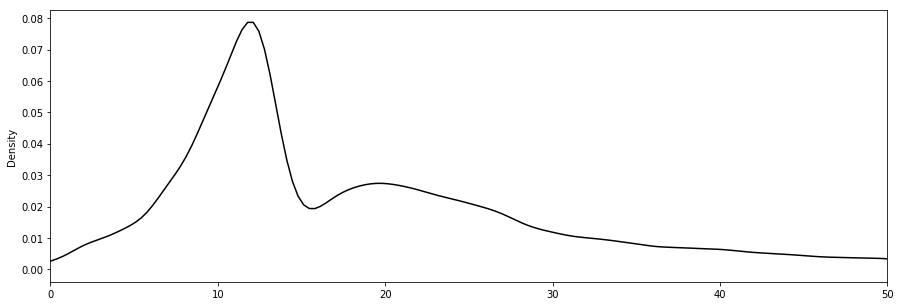

In [22]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [23]:
restaurants["GRADE DATE"].head(10)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5    05/11/2018
6    05/11/2018
7    05/18/2017
8    05/18/2017
9    03/04/2019
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [24]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")

In [25]:
restaurants["GRADE DATE"]

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
5        2018-05-11
6        2018-05-11
7        2017-05-18
8        2017-05-18
9        2019-03-04
10       2019-03-04
11       2019-03-04
12       2018-03-13
13       2018-03-13
14       2018-03-13
15       2017-10-06
16       2017-10-06
17              NaT
18       2016-10-27
19       2016-10-27
20              NaT
21              NaT
22              NaT
23              NaT
24              NaT
25       2016-04-30
26       2016-04-30
27       2016-04-30
28       2016-04-30
29              NaT
            ...    
382791          NaT
382792          NaT
382793          NaT
382794          NaT
382795          NaT
382796          NaT
382797          NaT
382798          NaT
382799          NaT
382800          NaT
382801          NaT
382802          NaT
382803          NaT
382804          NaT
382805          NaT
382806          NaT
382807          NaT
382808          NaT
382809          NaT


In [26]:
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
            

In [27]:
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [28]:
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
SCORE1                          float64
dtype: object

In [29]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,382821,190637,382821
unique,1389,1305,1
top,1900-01-01 00:00:00,2019-05-09 00:00:00,2019-05-22 00:00:00
freq,1348,536,382821
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2019-05-22 00:00:00
last,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00


#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

In [ ]:
# your code here

#### Solution

In [ ]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

In [ ]:
restaurants['GRADE DATE'].hist()

In [ ]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

In [ ]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

In [30]:
restaurants["GRADE"].head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5       A
6       A
7       A
8       A
9       A
10      A
11      A
12      A
13      A
14      A
15      A
16      A
17    NaN
18      A
19      A
Name: GRADE, dtype: object

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [ ]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [31]:
restaurants["DBA"].value_counts()[:10] 

DUNKIN'                    4228
SUBWAY                     2945
STARBUCKS                  2094
MCDONALD'S                 2049
KENNEDY FRIED CHICKEN      1254
DUNKIN', BASKIN ROBBINS    1228
CROWN FRIED CHICKEN        1009
DOMINO'S                   1000
BURGER KING                 952
POPEYES                     915
Name: DBA, dtype: int64

In [32]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                                            82072
Chinese                                                             39897
CafÃ©/Coffee/Tea                                                    18246
Pizza                                                               16847
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16523
Name: CUISINE DESCRIPTION, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

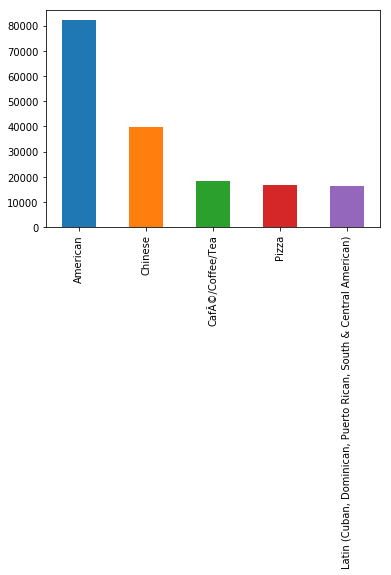

In [33]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [34]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                                            82072
Chinese                                                             39897
CafÃ©/Coffee/Tea                                                    18246
Pizza                                                               16847
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16523
Italian                                                             15605
Mexican                                                             15182
Japanese                                                            13617
Caribbean                                                           13486
Spanish                                                             11695
Bakery                                                              11576
Pizza/Italian                                                        8382
Chicken                                                              6874
Indian                                

In [36]:
type(popular)

pandas.core.series.Series

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [38]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [37]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


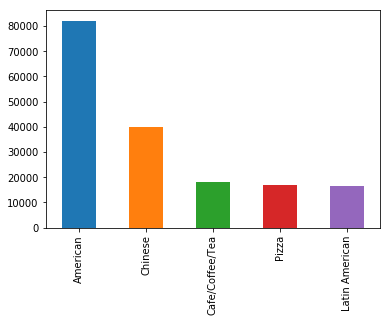

In [39]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [40]:
restaurants["VIOLATION CODE"].head(5)

0    04L
1    08A
2    08C
3    10E
4    10F
Name: VIOLATION CODE, dtype: object

In [41]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();

In [42]:
violation_counts[0:10]

10F    54138
08A    41224
04L    28602
06D    26217
06C    24698
10B    22744
02G    21919
02B    19889
04N    19056
04H     8054
Name: VIOLATION CODE, dtype: int64

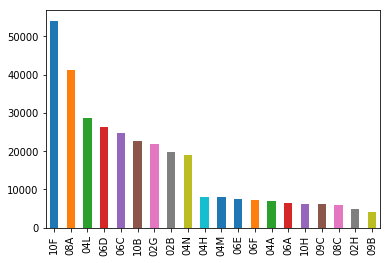

In [43]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [ ]:
# your code here

#### Solution 

In [ ]:
restaurants['BORO'].value_counts()

In [ ]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

In [ ]:
restaurants['BORO'].value_counts().plot(kind='bar')

In [ ]:
restaurants['BORO'].value_counts().plot(kind='barh')

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [44]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ]

,DBA,GRADE,GRADE DATE
0,MORRIS PARK BAKE SHOP,NaN,NaT
1,MORRIS PARK BAKE SHOP,NaN,NaT
2,MORRIS PARK BAKE SHOP,NaN,NaT
3,MORRIS PARK BAKE SHOP,NaN,NaT
4,MORRIS PARK BAKE SHOP,NaN,NaT
5,MORRIS PARK BAKE SHOP,A,2018-05-11
6,MORRIS PARK BAKE SHOP,A,2018-05-11
7,MORRIS PARK BAKE SHOP,A,2017-05-18
8,MORRIS PARK BAKE SHOP,A,2017-05-18
9,WENDY'S,A,2019-03-04


In [45]:
columns = ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,NaT,04L,MORRIS PARK BAKE SHOP,18.0
1,NaT,08A,MORRIS PARK BAKE SHOP,18.0
2,NaT,08C,MORRIS PARK BAKE SHOP,18.0
3,NaT,10E,MORRIS PARK BAKE SHOP,18.0
4,NaT,10F,MORRIS PARK BAKE SHOP,18.0
5,2018-05-11,08C,MORRIS PARK BAKE SHOP,5.0
6,2018-05-11,10F,MORRIS PARK BAKE SHOP,5.0
7,2017-05-18,06D,MORRIS PARK BAKE SHOP,7.0
8,2017-05-18,10F,MORRIS PARK BAKE SHOP,7.0
9,2019-03-04,02G,WENDY'S,13.0


In [46]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"] ].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,NaT,04L,MORRIS PARK BAKE SHOP,18.0
1,NaT,08A,MORRIS PARK BAKE SHOP,18.0
2,NaT,08C,MORRIS PARK BAKE SHOP,18.0
3,NaT,10E,MORRIS PARK BAKE SHOP,18.0
4,NaT,10F,MORRIS PARK BAKE SHOP,18.0
5,2018-05-11,08C,MORRIS PARK BAKE SHOP,5.0
6,2018-05-11,10F,MORRIS PARK BAKE SHOP,5.0
7,2017-05-18,06D,MORRIS PARK BAKE SHOP,7.0
8,2017-05-18,10F,MORRIS PARK BAKE SHOP,7.0
9,2019-03-04,02G,WENDY'S,13.0


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
restaurants

In [47]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
382791    False
382792    False
382793    False
382794    False
382795    False
382796    False
382797    False
382798    False
382799    False
382800    False
382801    False
382802    False
382803    False
382804    False
382805    False
382806    False
382807    False
382808    False
382809    False
382810    False
382811    False
382812    False
382813    False
382814    False
382815    False
382816    False
382817    False
382818    False
382819    False
382820    False
Name: VIOLATION CODE, Le

In [48]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,SCORE1
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,18.0
12,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2018-03-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2018-03-13,2019-05-22,Cycle Inspection / Initial Inspection,12.0
32,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2018-05-16,2019-05-22,Cycle Inspection / Initial Inspection,12.0
60,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369.0,7183350505,American,2016-05-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2016-05-14,2019-05-22,Cycle Inspection / Initial Inspection,10.0
67,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2017-06-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2017-06-03,2019-05-22,Cycle Inspection / Initial Inspection,13.0
70,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2018-05-16,2019-05-22,Cycle Inspection / Initial Inspection,13.0
74,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2017-06-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2017-06-22,2019-05-22,Cycle Inspection / Initial Inspection,10.0
108,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223.0,7183751500,Jewish/Kosher,2017-04-20,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2017-04-20,2019-05-22,Cycle Inspection / Re-inspection,12.0
111,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223.0,7183751500,Jewish/Kosher,2017-03-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,19.0
116,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223.0,7183751500,Jewish/Kosher,2016-08-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2016-08-29,2019-05-22,Cycle Inspection / Re-inspection,12.0


In [49]:
restaurants["DBA"].value_counts()[:10]

DUNKIN'                    4228
SUBWAY                     2945
STARBUCKS                  2094
MCDONALD'S                 2049
KENNEDY FRIED CHICKEN      1254
DUNKIN', BASKIN ROBBINS    1228
CROWN FRIED CHICKEN        1009
DOMINO'S                   1000
BURGER KING                 952
POPEYES                     915
Name: DBA, dtype: int64

In [50]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   237
DUNKIN'                                  154
KENNEDY FRIED CHICKEN                    116
CROWN FRIED CHICKEN                      105
STARBUCKS                                 83
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     76
POPEYES                                   75
MCDONALD'S                                66
DOMINO'S                                  63
DUNKIN', BASKIN ROBBINS                   61
BURGER KING                               57
KFC                                       38
CARVEL ICE CREAM                          33
LITTLE CAESARS                            33
LE PAIN QUOTIDIEN                         31
AMC THEATRES                              29
VIVI BUBBLE TEA                           26
BAREBURGER                                21
EMPANADAS MONUMENTAL                      21
PAPA JOHN'S                               20
Name: DBA, dtype: int64

In [51]:
has_mice["CAMIS"].value_counts()[:5]

50016943    12
41465002    11
41259444    11
50036890    11
50001192    11
Name: CAMIS, dtype: int64

In [53]:
condition = (has_mice["CAMIS"] == 41259444)
has_mice[condition]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,SCORE1
81209,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2019-02-11,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,75.0,NaN,NaT,2019-05-22,Cycle Inspection / Re-inspection,75.0
81214,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2018-12-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,12.0
81218,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2018-07-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2018-07-25,2019-05-22,Cycle Inspection / Re-inspection,11.0
81221,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2018-06-08,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,9.0,P,2018-06-08,2019-05-22,Cycle Inspection / Reopening Inspection,9.0
81223,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2018-06-05,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,43.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,43.0
81227,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2017-12-19,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2017-12-19,2019-05-22,Cycle Inspection / Re-inspection,12.0
81231,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2017-10-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,46.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,46.0
81236,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2017-03-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2017-03-30,2019-05-22,Cycle Inspection / Re-inspection,12.0
81239,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2017-03-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,17.0
81244,41259444,COCO ROCO RESTAURANT,BROOKLYN,392,5 AVENUE,11215.0,7189653376,Peruvian,2016-09-07,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,B,2016-09-07,2019-05-22,Cycle Inspection / Re-inspection,23.0


And we can use more complex conditions. 

In [55]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == 10012) )

In [56]:
mice_manhattan

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
382791    False
382792    False
382793    False
382794    False
382795    False
382796    False
382797    False
382798    False
382799    False
382800    False
382801    False
382802    False
382803    False
382804    False
382805    False
382806    False
382807    False
382808    False
382809    False
382810    False
382811    False
382812    False
382813    False
382814    False
382815    False
382816    False
382817    False
382818    False
382819    False
382820    False
Length: 382821, dtype: b

In [57]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,SCORE1
192,40362274,ANGELIKA FILM CENTER,MANHATTAN,18,WEST HOUSTON STREET,10012.0,2129952570,American,2019-01-02,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-01-02,2019-05-22,Cycle Inspection / Initial Inspection,10.0
195,40362274,ANGELIKA FILM CENTER,MANHATTAN,18,WEST HOUSTON STREET,10012.0,2129952570,American,2018-07-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,B,2018-07-09,2019-05-22,Cycle Inspection / Re-inspection,23.0
200,40362274,ANGELIKA FILM CENTER,MANHATTAN,18,WEST HOUSTON STREET,10012.0,2129952570,American,2018-06-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,38.0
207,40362274,ANGELIKA FILM CENTER,MANHATTAN,18,WEST HOUSTON STREET,10012.0,2129952570,American,2016-11-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,B,2016-11-18,2019-05-22,Cycle Inspection / Re-inspection,19.0
212,40362274,ANGELIKA FILM CENTER,MANHATTAN,18,WEST HOUSTON STREET,10012.0,2129952570,American,2016-10-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,30.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,30.0
1243,40365348,PANCHITO'S,MANHATTAN,103,MACDOUGAL STREET,10012.0,2124735239,Mexican,2018-09-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,B,2018-09-04,2019-05-22,Cycle Inspection / Re-inspection,18.0
1248,40365348,PANCHITO'S,MANHATTAN,103,MACDOUGAL STREET,10012.0,2124735239,Mexican,2018-05-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,26.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,26.0
1259,40365348,PANCHITO'S,MANHATTAN,103,MACDOUGAL STREET,10012.0,2124735239,Mexican,2016-06-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,32.0
1295,40365387,ARTURO'S,MANHATTAN,106,WEST HOUSTON STREET,10012.0,2126773820,Italian,2018-03-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2019-05-22,Cycle Inspection / Initial Inspection,20.0
1306,40365387,ARTURO'S,MANHATTAN,106,WEST HOUSTON STREET,10012.0,2126773820,Italian,2016-05-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2016-05-12,2019-05-22,Cycle Inspection / Initial Inspection,12.0


In [59]:
has_mice_10012["DBA"].value_counts()[:20]

LITTLE CUPCAKE BAKE SHOP        8
SUSHI SUSHI                     7
SPRINGBONE KITCHEN              7
KOPI KOPI                       7
COCO & CRU/SWEETWATER SOCIAL    7
TRIONA'S                        6
DOJO RESTAURANT                 6
DUMPLING KINGDOM                6
DANTE                           6
CAFETAL SOCIAL CLUB/ CHACHIS    6
INSOMNIA COOKIES                6
LITTLE RASCAL                   6
GO ZEN RESTAURANT               5
MONTE'S                         5
BEN'S PIZZA                     5
EPISTROPHY CAFE                 5
COCORON                         5
THE RED LION                    5
ANGELIKA FILM CENTER            5
BAO TEA HOUSE                   5
Name: DBA, dtype: int64

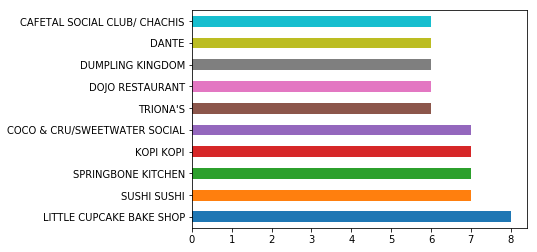

In [60]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='barh')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.plot()

In [ ]:
pivot.head(5)

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [ ]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

In [ ]:
pivot.head(5)

And let's plot again.

In [ ]:
pivot.plot(figsize=(10,5))

In [ ]:
pivot.tail(50).plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample('1W').mean().tail(10)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

In [ ]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

In [ ]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.tail(10)

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis='columns')

In [ ]:
pivot2.tail(5)

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

In [ ]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot(figsize=(10,5))

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

### (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants, #
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # compute the average SCORE
)

In [ ]:
pivot.plot(figsize=(10,4))

In [ ]:
pivot.resample('1M').mean().tail(10)



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # dates are the rows
    columns = 'CUISINE DESCRIPTION', # cuisines are the columns
    values = 'SCORE',  # we analyze the SCORE
    aggfunc = 'mean' # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[ ["American", "French", "Chinese"] ].resample('1M').mean().plot(figsize=(10,4))

## Exercise: NYPD Vehicle Collisions

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### Task 1: 

Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 


In [ ]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

In [ ]:
df = pd.read_csv("accidents.csv")

In [ ]:
len(df)

#### Solution

In [ ]:
# It is a big file, ~270Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

In [ ]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [ ]:
df.dtypes


### Task 2: 

Find out the most common contributing factors to the collisions. 
 

In [ ]:
df.dtypes

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:11].plot(kind='barh')

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(11).tail(10)

#### Solution

In [ ]:
# Task 2: Find out the most common contributing factors to the collisions.
# Notice that we skip the first element (0) of the list, and we get the elements 1:10
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

### Task 3: 

Break down the number of collisions by borough.





In [ ]:
df.BOROUGH.value_counts().plot(kind='barh')

#### Solution

In [ ]:
# Task 3: Break down the number of collisions by borough.
df['BOROUGH'].value_counts().plot(kind='barh')

### Task 4

Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

In [ ]:
(
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)

#### Solution

In [ ]:
# "Chain" style of writing data maniputation operations
plot = (
    df['NUMBER OF PERSONS INJURED'] # We analyze people injured
    .value_counts() # Count how many accidents had this number of injuries
    .sort_index() # Sort the x-axis
    .plot( 
        # kind='bar', # Create a bar plot
        logy=True # Make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

### Task 5

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

In [ ]:
df.dtypes

In [ ]:
pd.pivot_table(
    data = df,
    index = 'CONTRIBUTING FACTOR VEHICLE 1',
    columns = 'BOROUGH',
    aggfunc = 'count',
    values = 'UNIQUE KEY'
)

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

### Task 6

Find the dates with the most accidents. Can you figure out what happened on these days? 


In [ ]:
df.DATE.value_counts()

#### Solution

In [ ]:
df.DATE.value_counts()

### Task 7

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


In [ ]:
df.DATE = pd.to_datetime(df.DATE, format="%m/%d/%Y")

In [ ]:
(
    df.DATE
    .value_counts() # compute number of accidents per day
    .sort_index() # sort the results chronologically
    .resample('1M') # compute the mean number of accidents/day over a period of a year
    .mean() 
    .plot() # plot the results
)

#### Solution 

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")

In [ ]:
(
    df.DATE.value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2018-05-31'), axis='index') # drop the current month
    .plot() # plot the result
)

### Task 8

Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

In [ ]:
base = df[ (df.LATITUDE>40) & (df.LATITUDE<41) & (df.LONGITUDE> -74.6) & (df.LONGITUDE<-50) ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7),
    s = 0.5, # make each dot to be very small 
    alpha = 0.05 # makes each point 95% transparent
)

df[ (df.LATITUDE>40) & (df.LATITUDE<41) & (df.LONGITUDE> -74.6) & (df.LONGITUDE<-50)
    & (df["NUMBER OF PERSONS KILLED"]>0)
  ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7), color = 'red', marker = 'x', s=3,
    ax = base
    #s = 0.5, # make each dot to be very small 
    #alpha = 0.05 # makes each point 95% transparent
)

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Task 9

Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Bonus plots

In [ ]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

In [ ]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)
